In [ ]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

In [ ]:
df=pd.read_csv(r'/content/HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [ ]:
df.dtypes

,0
lesion_id,object
image_id,object
dx,object
dx_type,object
age,float64
sex,object
localization,object


In [ ]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [ ]:
df.isnull().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,0
sex,0
localization,0


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = '../input/skin-cancer-mnist-ham10000'

# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [ ]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


In [ ]:
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']

<Axes: title={'center': 'CELL TYPE'}, xlabel='cell_type', ylabel='Count'>

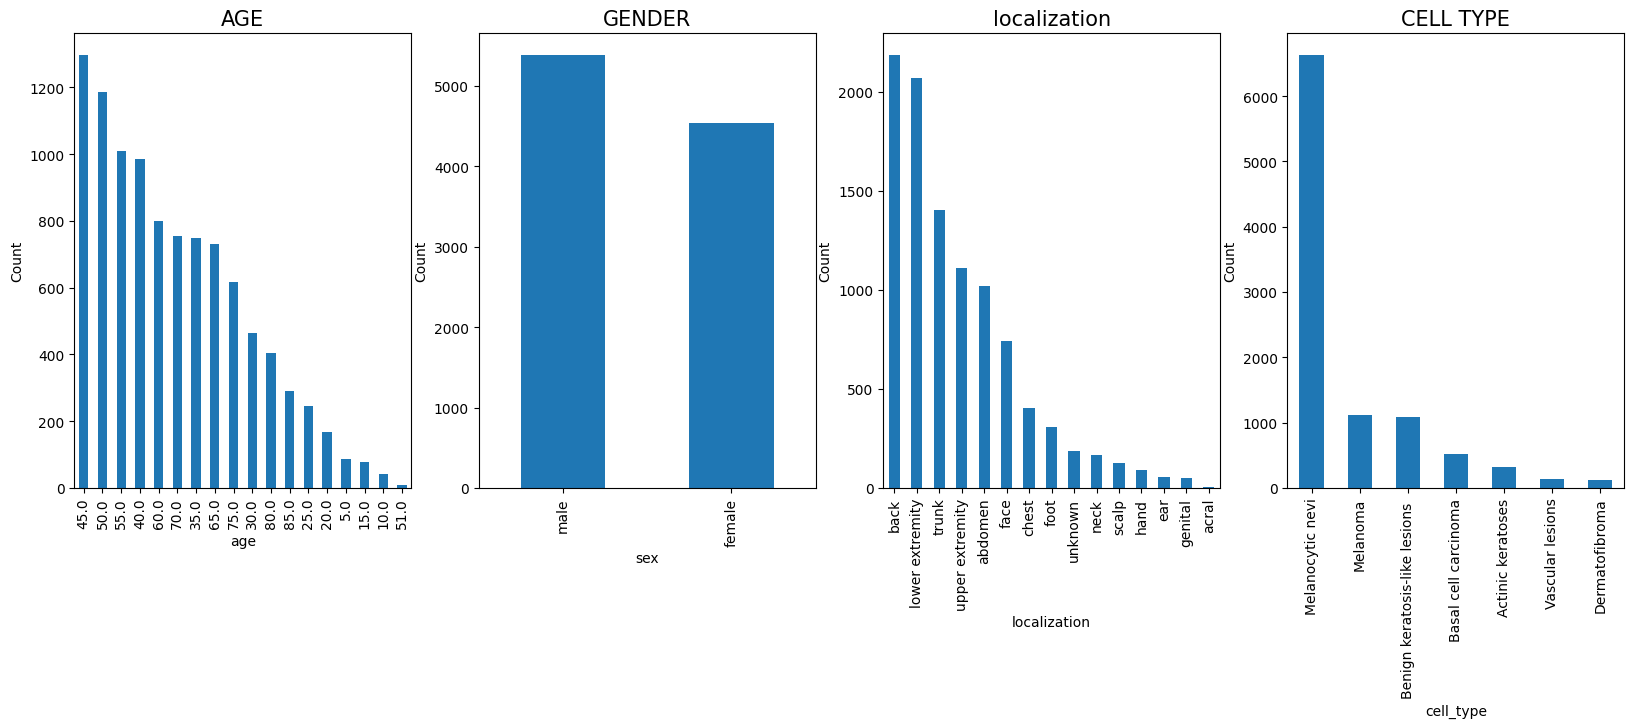

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()

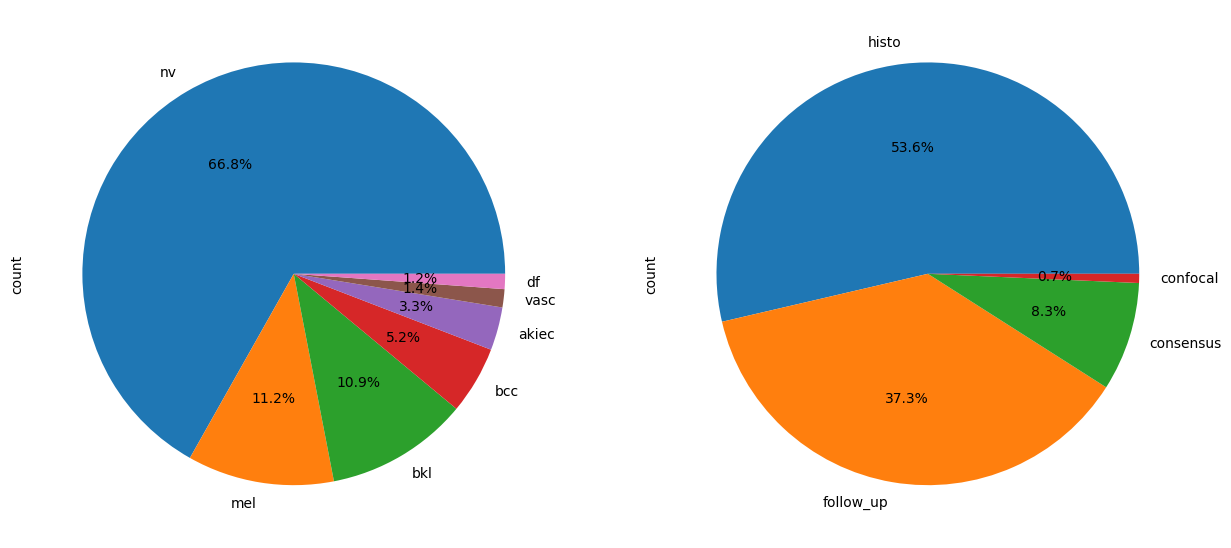

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<Axes: title={'center': 'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

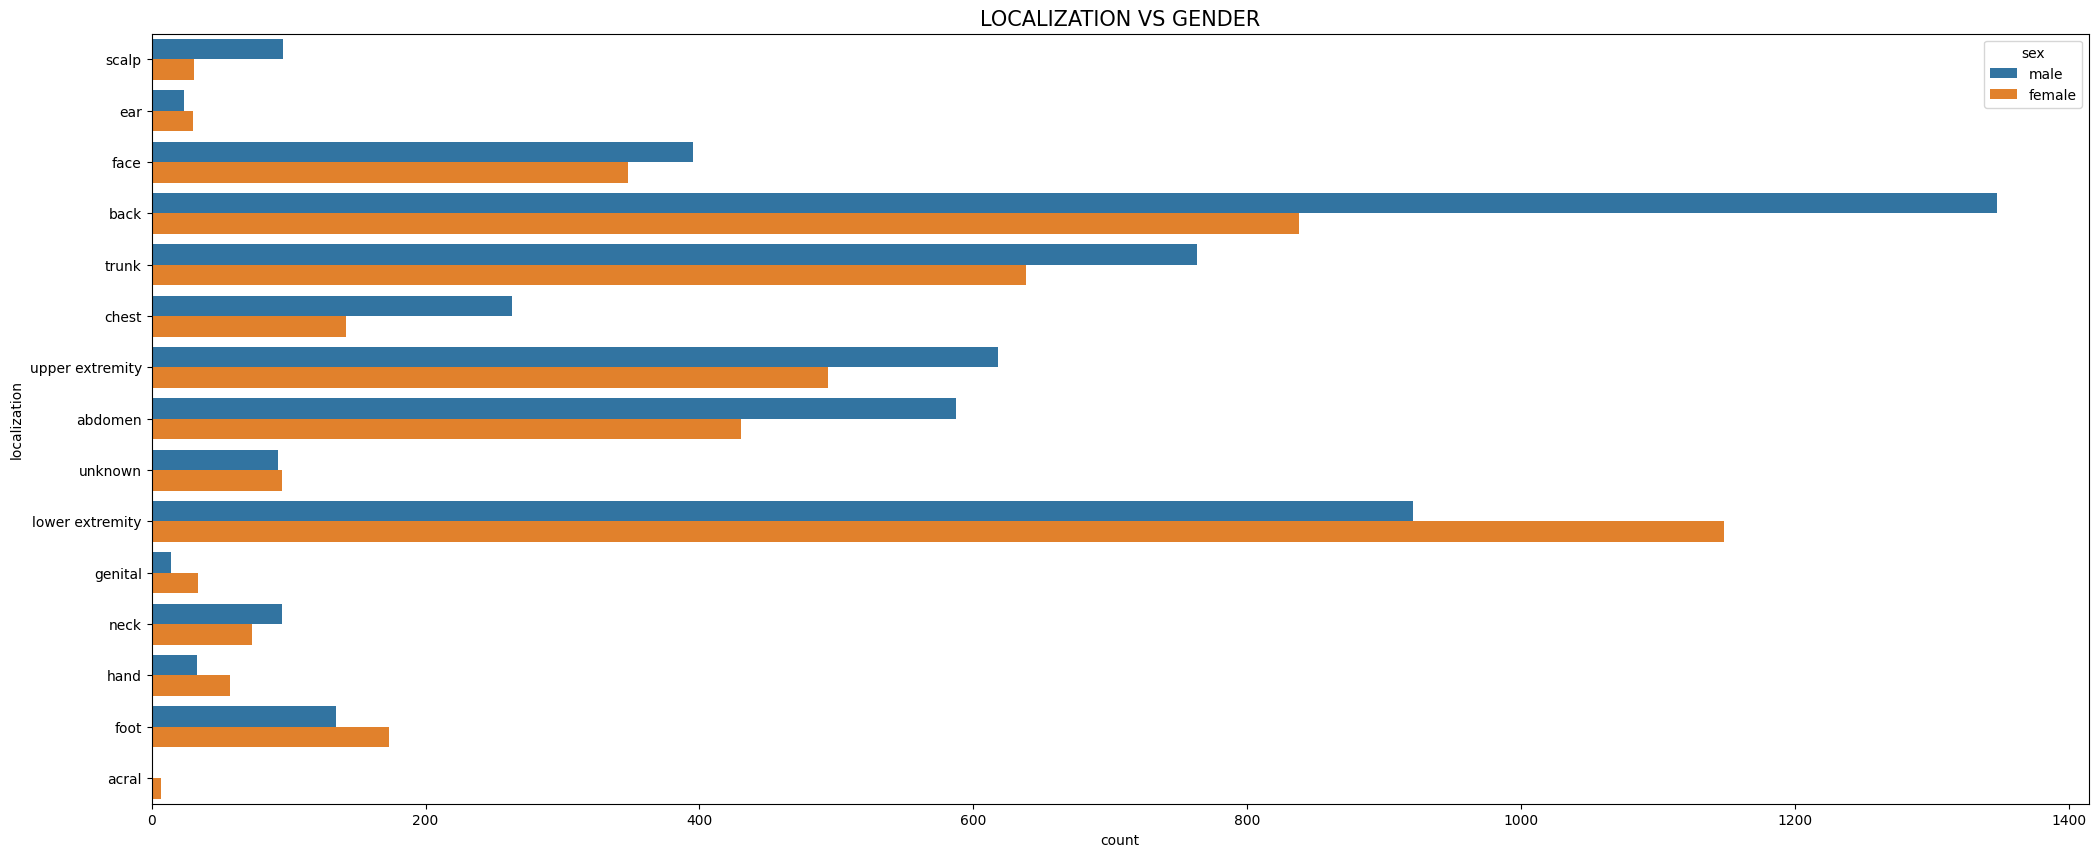

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

<Axes: title={'center': 'LOCALIZATION VS CELL TYPE'}, xlabel='count', ylabel='localization'>

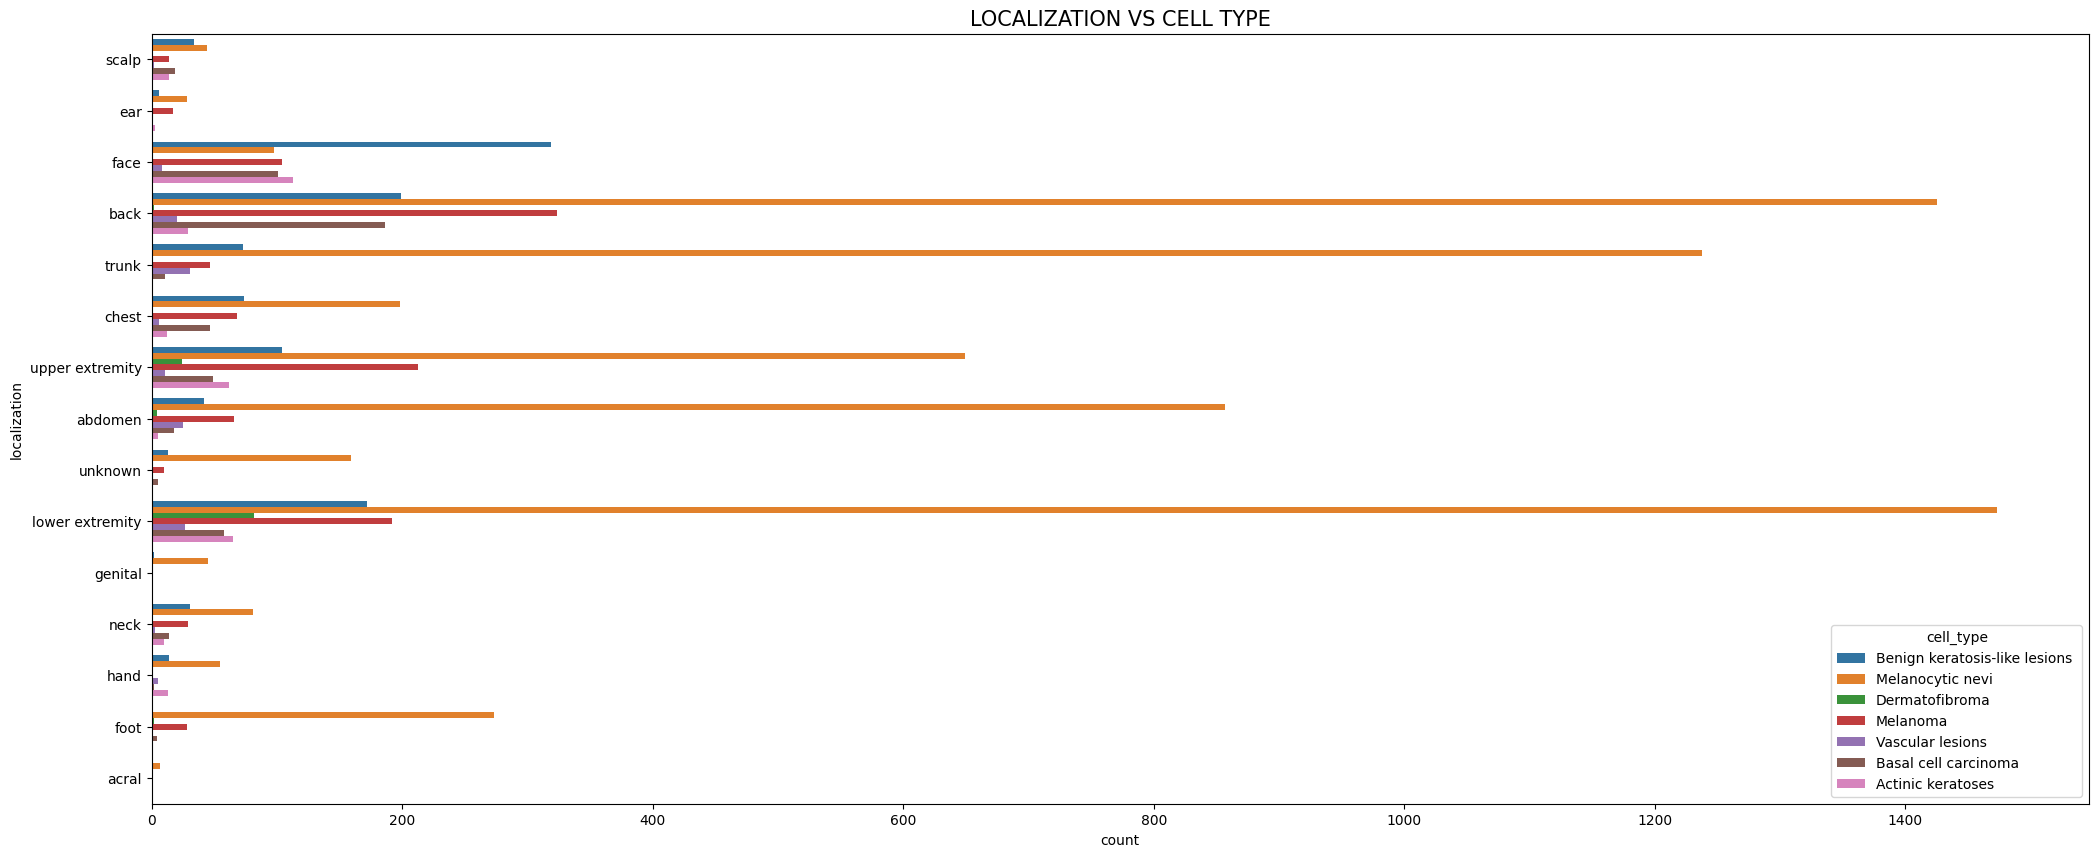

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)

<Axes: title={'center': 'GENDER VS CELL TYPE'}, xlabel='count', ylabel='sex'>

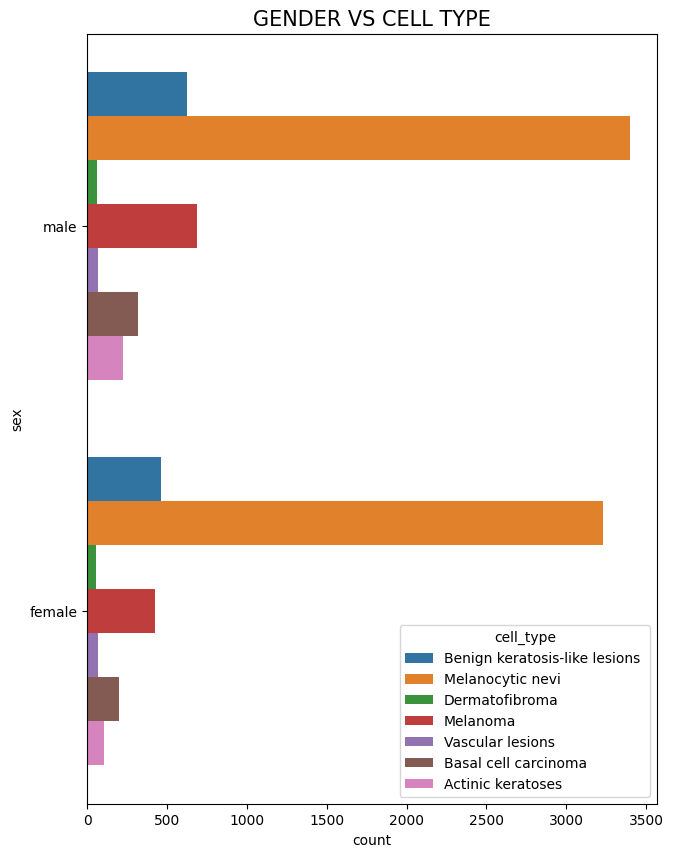

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload() # Remove the argument

# Extract the zip file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('dataset')

# List the extracted folder
!ls dataset

Saving archive (2).zip to archive (2).zip
archive


In [ ]:
# Update the path to point to the archive directory
DATASET_PATH = '/content/dataset'

# Define the load_dataset function if it doesn't exist
# This is just a placeholder, make sure to implement the actual loading logic
def load_dataset(DATASET_PATH):
  # Replace this with your dataset loading logic
  X = np.array([[1, 2], [3, 4]])
  y = np.array([0, 1])
  return X, y

# Load the dataset from the archive folder
X, y = load_dataset(DATASET_PATH)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2, 2), y shape: (2,)


In [ ]:
import os

DATASET_PATH = 'dataset/archive/Dataset'

# List the contents of the folder to check the structure
print("Folder contents:", os.listdir(DATASET_PATH))

Folder contents: ['train', 'test']


In [ ]:
import os

DATASET_PATH = 'dataset/archive/Dataset'

# Check the contents of the first-level folder
class_folders = os.listdir(DATASET_PATH)
print("First-level folder contents:", class_folders)

# Check contents of each class folder
for folder in class_folders:
    folder_path = os.path.join(DATASET_PATH, folder)
    if os.path.isdir(folder_path):
        print(f"Contents of {folder_path}: {os.listdir(folder_path)}")

First-level folder contents: ['train', 'test']
Contents of dataset/archive/Dataset/train: ['Acne and Rosacea Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Vascular Tumors', 'Shingles', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos']
Contents of dataset/archive/Dataset/test: ['Acne and Rosacea Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Vascular Tumors', 'Shingles', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos']


In [ ]:
import os
import cv2
import numpy as np

# Helper function to load dataset from the "train" or "test" folder
def load_dataset(path, img_size=(128, 128)):
    X = []
    y = []

    # Check if the main directory exists
    if not os.path.isdir(path):
        print(f"Error: Directory not found: {path}")
        return np.array(X), np.array(y)

    # Loop through class subdirectories (e.g., 'Eczema Photos', 'Acne and Rosacea Photos')
    for class_folder in os.listdir(path):
        class_dir = os.path.join(path, class_folder)
        if os.path.isdir(class_dir):
            print(f"Processing directory: {class_dir}")  # Print the directory being processed
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                # Check if the file is an image
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, img_size)  # Resize image
                        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                        X.append(gray_img)
                        y.append(class_folder)  # Use folder name as label
                    else:
                        print(f"Failed to load image: {img_path}")
                else:
                    print(f"Skipping non-image file: {img_file}")

    return np.array(X), np.array(y)

# Define paths to the train and test directories
TRAIN_PATH = 'dataset/archive/Dataset/train'
TEST_PATH = 'dataset/archive/Dataset/test'

# Load training and testing data
X_train, y_train = load_dataset(TRAIN_PATH)
X_test, y_test = load_dataset(TEST_PATH)

# Print the shapes of the loaded datasets
print(f"Training data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Labels: {y_test.shape}")

Processing directory: dataset/archive/Dataset/train/Acne and Rosacea Photos
Processing directory: dataset/archive/Dataset/train/Cellulitis Impetigo and other Bacterial Infections
Processing directory: dataset/archive/Dataset/train/Vascular Tumors
Processing directory: dataset/archive/Dataset/train/Shingles
Processing directory: dataset/archive/Dataset/train/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Processing directory: dataset/archive/Dataset/train/Eczema Photos
Processing directory: dataset/archive/Dataset/test/Acne and Rosacea Photos
Processing directory: dataset/archive/Dataset/test/Cellulitis Impetigo and other Bacterial Infections
Processing directory: dataset/archive/Dataset/test/Vascular Tumors
Processing directory: dataset/archive/Dataset/test/Shingles
Processing directory: dataset/archive/Dataset/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Processing directory: dataset/archive/Dataset/test/Eczema Photos
Training data: (104,

In [ ]:
import cv2
import numpy as np # Removed extra space before this line
import os
from skimage.feature import hog
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Function to extract SIFT features
def extract_sift_features(image):
  sift = cv2.SIFT_create()
  keypoints, descriptors = sift.detectAndCompute(image, None)
  if descriptors is not None:
    return descriptors.flatten()[:500]  # Take first 500 features
    else:
      return np.zeros(500)

# Function to extract HOG features
def extract_hog_features(image):
  features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True)
  return features

# Load dataset and extract features
X = []
y = []
classes = [] # Define 'classes' before using it
DATASET_PATH = 'dataset/archive/Dataset'  # Update this path if needed
# Iterate through all subfolders and files
for root, dirs, files in os.walk(DATASET_PATH):
  for file in files:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
      img_path = os.path.join(root, file)
      try:
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
          image = cv2.resize(image, (128, 128))
          sift_features = extract_sift_features(image)
          hog_features = extract_hog_features(image)
          combined_features = np.h

Test Accuracy: 41.69%
Label Mapping: {0: 'Acne and Rosacea Photos', 1: 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 2: 'Cellulitis Impetigo and other Bacterial Infections', 3: 'Eczema Photos', 4: 'Shingles', 5: 'Vascular Tumors'}


Combining HOG and SIFT features into a single feature set

In [ ]:
import cv2
import numpy as np

# Function to extract SIFT features
def extract_sift_features(images):
    sift = cv2.SIFT_create()  # Initialize SIFT detector
    sift_features = []
    for img in images:
        keypoints, descriptors = sift.detectAndCompute(img, None)  # Detect keypoints and descriptors
        if descriptors is not None:
            descriptors = descriptors.flatten()  # Flatten descriptors to 1D array
            # Ensure a fixed length for SIFT descriptors (padding or truncating)
            if len(descriptors) < 128:
                descriptors = np.pad(descriptors, (0, 128 - len(descriptors)), 'constant')
            elif len(descriptors) > 128:
                descriptors = descriptors[:128]
        else:
            descriptors = np.zeros((128,))  # If no descriptors found, fill with zeros
        sift_features.append(descriptors)
    return np.array(sift_features)


In [ ]:
# Extract HOG and SIFT features from the training and testing data
X_train_hog = extract_hog_features(X_train)
X_train_sift = extract_sift_features(X_train)
X_test_hog = extract_hog_features(X_test)
X_test_sift = extract_sift_features(X_test)

# Concatenate HOG and SIFT features
X_train_features = np.hstack((X_train_hog, X_train_sift))
X_test_features = np.hstack((X_test_hog, X_test_sift))

# Print shapes and samples for debugging
print(f"Shape of X_train_features: {X_train_features.shape}")
print(f"Sample features from X_train_features: {X_train_features[0][:10]}")  # Print the first 10 features

print(f"Shape of X_test_features: {X_test_features.shape}")
print(f"Sample features from X_test_features: {X_test_features[0][:10]}")  # Print the first 10 features

# Standardize the concatenated features
scaler = StandardScaler()
X_train_features_scaled = scaler.fit_transform(X_train_features)
X_test_features_scaled = scaler.transform(X_test_features)

# Print the shape of scaled features for debugging
print(f"Shape of X_train_features_scaled: {X_train_features_scaled.shape}")
print(f"Shape of X_test_features_scaled: {X_test_features_scaled.shape}")


Shape of X_train_features: (104, 8228)
Sample features from X_train_features: [0.18554415 0.12127635 0.04462462 0.14409791 0.22306802 0.08432527
 0.09261133 0.2116696  0.15897396 0.22306802]
Shape of X_test_features: (391, 8228)
Sample features from X_test_features: [0.28180939 0.         0.26628483 0.06014762 0.28180939 0.12029523
 0.11412207 0.12029523 0.         0.28180939]
Shape of X_train_features_scaled: (104, 8228)
Shape of X_test_features_scaled: (391, 8228)


In [ ]:
from sklearn.svm import SVC

# Train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_hog_scaled, y_train_encoded)

SVC(kernel='linear')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_features_scaled, y_train_encoded)

# Predict on the test data
y_pred = svm_clf.predict(X_test_features_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(y_test_encoded, y_pred, average='weighted')
print(f"Weighted Precision: {precision:.2f}")

Test Accuracy: 41.69%
Weighted Precision: 0.63


Confusion Matrix:
[[85 61 22 24  0 39]
 [16 51 15  4  0 34]
 [ 4  2  3  4  0  1]
 [ 1  1  0  0  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0 20]]


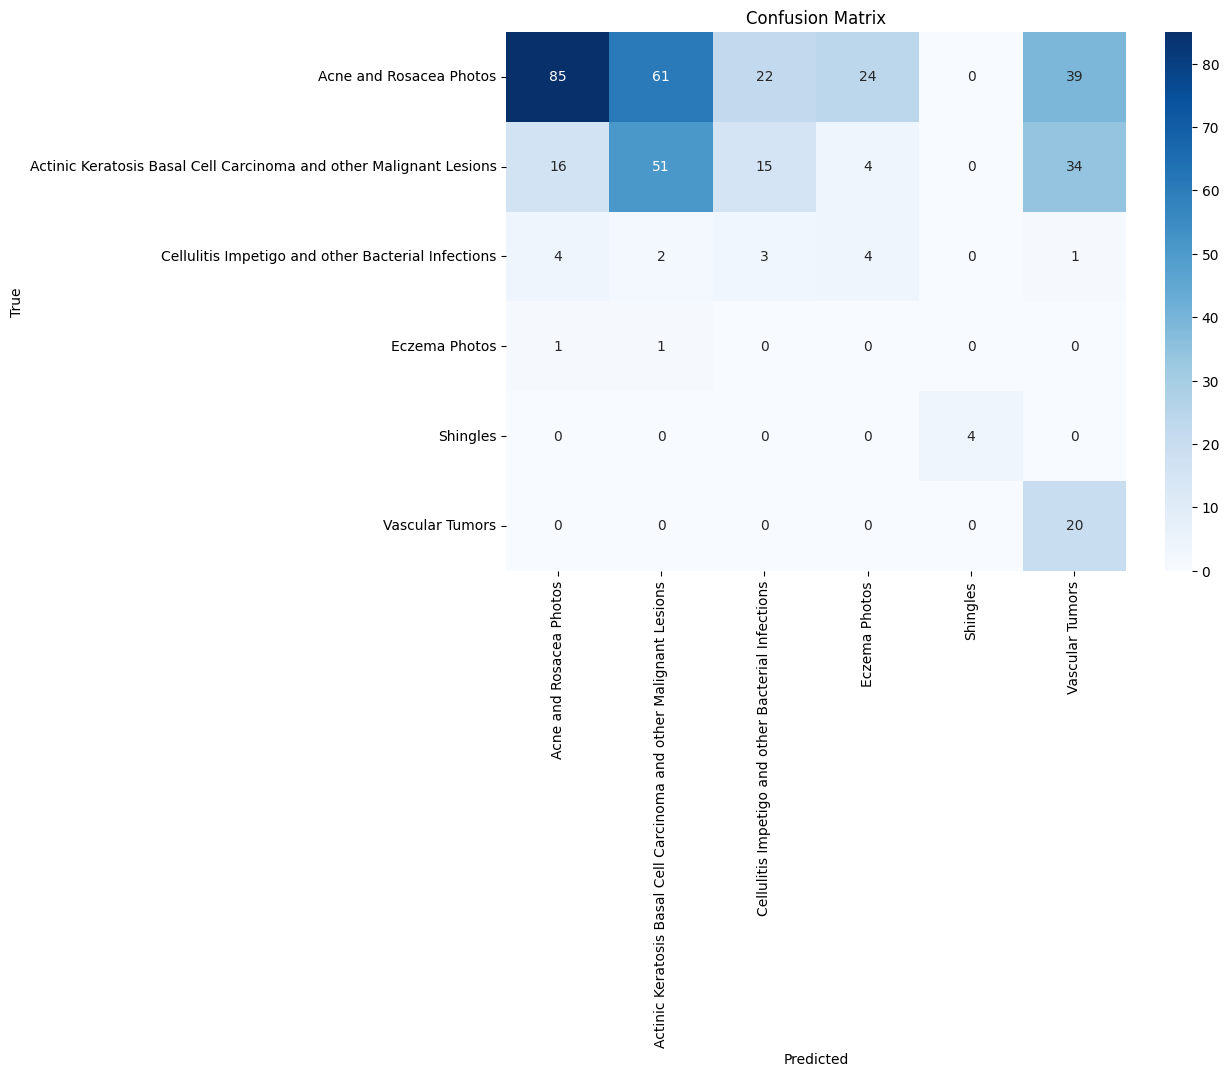

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import cv2
import numpy as np

# Define paths and preprocess functions
new_image_path = '/content/spider-angioma-1.jpg'

def preprocess_image(image_path, img_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is not None:
        img_resized = cv2.resize(img, img_size)
        gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        return gray_img
    else:
        raise ValueError(f"Failed to load image from path: {image_path}")

new_img_gray = preprocess_image(new_image_path)

# Extract features
new_img_hog = extract_hog_features([new_img_gray])
new_img_sift = extract_sift_features([new_img_gray])
new_img_features = np.hstack((new_img_hog, new_img_sift))

# Standardize the features
new_img_features_scaled = scaler.transform(new_img_features)

# Make a prediction
predicted_label_encoded = svm_clf.predict(new_img_features_scaled)
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)
print(f"Predicted Label: {predicted_label[0]}")

Predicted Label: Vascular Tumors


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_test_pred = svm_clf.predict(X_test_features_scaled)

# Calculate precision, recall, F1-score, and confusion matrix
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_test_pred))

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.80      0.37      0.50       231
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.44      0.42      0.43       120
                Cellulitis Impetigo and other Bacterial Infections       0.07      0.21      0.11        14
                                                     Eczema Photos       0.00      0.00      0.00         2
                                                          Shingles       1.00      1.00      1.00         4
                                                   Vascular Tumors       0.21      1.00      0.35        20

                                                          accuracy                           0.42       391
                                                         macro avg       0.42      0.50      0.40       391
   

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform grid search with cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train_hog_scaled, y_train_encoded)

# Print the best parameters and the corresponding accuracy
print(f"Best parameters: {grid.best_params_}")
print(f"Best accuracy from grid search: {grid.best_score_}")

# Use the best estimator for predictions
svm_clf_tuned = grid.best_estimator_
y_pred_tuned = svm_clf_tuned.predict(X_test_hog_scaled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.190 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.190 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.190 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.190 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.200 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.238 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.190 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.238 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.190 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.200 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.524 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.476 total time=   0.1s
[CV 5/5] END ....C=0.1, gamm